# Import Packages

In [2]:
import numpy as np
from imutils import perspective
from scipy.spatial import distance as dist
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from scipy.spatial import distance
import pandas as pd

# Make image big/small maintiaing aspect ratio

In [3]:
def maintain_aspect_ratio_resize_2d(image, width=None, height=None, inter=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape
    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))
    return cv2.resize(image, dim, interpolation=inter)

# Template Match Function

In [5]:
def template_match(gray, template):

    (tH, tW) = template.shape[:2]
    found = None

    for scale in np.linspace(0.1, 3.0, 20)[::-1]:

        # Resize image to scale and keep track of ratio
        resized = maintain_aspect_ratio_resize_2d(gray, width=int(gray.shape[1] * scale))
        r = gray.shape[1] / float(resized.shape[1])

        # Stop if template image size is larger than resized image
        if resized.shape[0] < tH or resized.shape[1] < tW:
            break

        # Threshold resized image and apply template matching
        thresh = cv2.threshold(resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
        detected = cv2.matchTemplate(thresh, template, cv2.TM_CCOEFF)
        (_, max_val, _, max_loc) = cv2.minMaxLoc(detected)

        # Keep track of correlation value
        # Higher correlation means better match
        if found is None or max_val > found[0]:
            found = (max_val, max_loc, r)
            #print("Found Update", found, scale)

    return found

# Make Tooth list using tooth repository csv file

In [8]:
tooth_repo = pd.read_csv('sample_tooth_number.csv')
tooth_repo.shape
upper_left_tooth_repo_list = []
upper_right_tooth_repo_list = []
lower_left_tooth_repo_list = []
lower_right_tooth_repo_list = []

print(tooth_repo.shape)
for i in range(tooth_repo.shape[0]):
    dir_name = tooth_repo['Folder Name'].iloc[i] 
    position = tooth_repo['Position'].iloc[i] 
    if dir_name == 'upper_tooth_repository' and position =='UL':
        image_file = dir_name + '/' + tooth_repo['Tooth Name'].iloc[i] 
        upper_left_tooth_repo_list.append((image_file, tooth_repo['Tooth Number'].iloc[i] ))
    if dir_name == 'upper_tooth_repository' and position =='UR':
        image_file = dir_name + '/' + tooth_repo['Tooth Name'].iloc[i] 
        upper_right_tooth_repo_list.append((image_file, tooth_repo['Tooth Number'].iloc[i] ))

    if dir_name == 'lower_tooth_repository' and position =='LL':
        image_file = dir_name + '/' + tooth_repo['Tooth Name'].iloc[i] 
        lower_left_tooth_repo_list.append((image_file, tooth_repo['Tooth Number'].iloc[i] ))
        
    if dir_name == 'lower_tooth_repository' and position =='LR':
        image_file = dir_name + '/' + tooth_repo['Tooth Name'].iloc[i] 
        lower_right_tooth_repo_list.append((image_file, tooth_repo['Tooth Number'].iloc[i] ))
        
        
        
print(len(upper_left_tooth_repo_list), len(upper_right_tooth_repo_list),
      len(lower_left_tooth_repo_list), len(lower_right_tooth_repo_list))
    
    

(188, 5)
46 47 47 48


# Sample Periapical Image

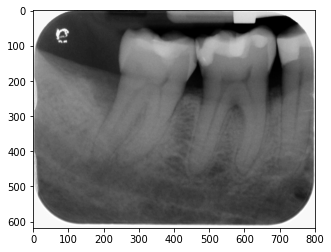

In [9]:
template_peri = cv2.imread('sample_images/peri_images/sample_1.png',0)
plt.imshow(template_peri, cmap='gray')


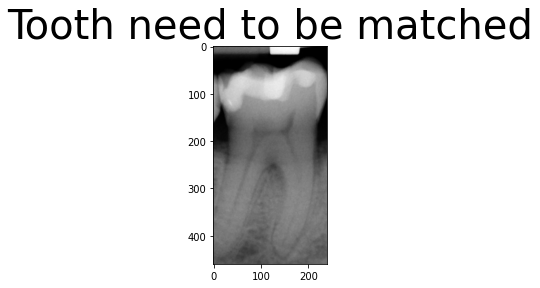

In [12]:
#template_peri_to_match = template_peri[20:480,450:690]
template_peri_to_match = template_peri[20:480,450:690]
plt.title("Tooth need to be matched" , fontsize = 40)
plt.imshow(template_peri_to_match, cmap='gray')

periapical_tooth_track_list = []
template = template_peri_to_match
for j in range(len(lower_left_tooth_repo_list)):
    gray  = cv2.imread(lower_left_tooth_repo_list[j][0],0)
    found = template_match(gray,template)
    if found !=None:
        periapical_tooth_track_list.append((j,lower_left_tooth_repo_list[j], found[0]))
periapical_tooth_track_list_sorted = sorted(periapical_tooth_track_list, key=lambda x:x[2], reverse=True)

# Final Match

In [25]:
# y = periapical_tooth_track_list_sorted[0:5]

print("Template match should be ")

universal_list = [y[0][1][1], y[1][1][1], y[2][1][1],y[3][1][1],y[4][1][1]]

print(universal_list)

final_list = [y[0][1][1], y[1][1][1], y[2][1][1],y[3][1][1],y[4][1][1]]

for i in range(len(universal_list)):
    if universal_list[i] ==1:
        final_list[i] = 48
    if universal_list[i] ==2:
        final_list[i] = 47
    if universal_list[i] ==3:
        final_list[i] = 46
    if universal_list[i] ==4:
        final_list[i] = 45
    if universal_list[i] ==5:
        final_list[i] = 44
    if universal_list[i] ==6:
        final_list[i] = 43
    if universal_list[i] ==7:
        final_list[i] = 42
    if universal_list[i] ==8:
        final_list[i] = 41
    
        
print("Top Five Final matched list:",final_list)




Template match should be 
[3, 2, 3, 2, 3]
Top Five Final matched list: [46, 47, 46, 47, 46]


# Find intersection of tooth and CEJ